In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fake_job_df = pd.read_csv('fake_job_postings.csv')
fake_job_df.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [2]:
fake_job_df.describe()


,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
fake_job_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
#To check for number of null values
fake_job_df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [5]:
#To check for dplicate rows in the dataset
fake_job_df.duplicated().sum()

0

In [6]:
# To separate Categorical data and Numerical data
fake_Num = fake_job_df[['telecommuting','has_company_logo','has_questions',
                       'fraudulent','salary_range']]
fake_Cat = fake_job_df[['title','location','department','company_profile',
                       'description','requirements','benefits','employment_type',
                       'required_experience','required_education','industry',
                       'function']]


In [7]:
#Removing rows with null values
fake_job_df.dropna(axis= 0, how= 'any', inplace=True)
fake_job_df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

### Which Industry has the highest number of Fake Job Postings.


In [8]:
# To include rows which are fake job postings
industry_df = fake_job_df[fake_job_df['fraudulent']== 1]

#To check unique elements in industry
industry_df['industry'].value_counts()


Oil & Energy                            17
Real Estate                             10
Consumer Services                        8
Financial Services                       6
Computer & Network Security              5
Hospital & Health Care                   4
Management Consulting                    3
Retail                                   3
Insurance                                2
Telecommunications                       2
Human Resources                          2
Transportation/Trucking/Railroad         2
Construction                             1
Security and Investigations              1
Warehousing                              1
Logistics and Supply Chain               1
Accounting                               1
Information Services                     1
Mechanical or Industrial Engineering     1
Computer Networking                      1
Name: industry, dtype: int64

In [9]:
#To create a new dataframe with two columns industry and fraudulent
highest_df= fake_job_df.groupby('industry', as_index=False)['fraudulent'].sum()
highest_df.head(7)

,industry,fraudulent
0,Accounting,1
1,Apparel & Fashion,0
2,Automotive,0
3,Aviation & Aerospace,0
4,Banking,0
5,Biotechnology,0
6,Civil Engineering,0


### Data Visualization using Seaborn


Text(0, 0.5, 'Fraudulent')

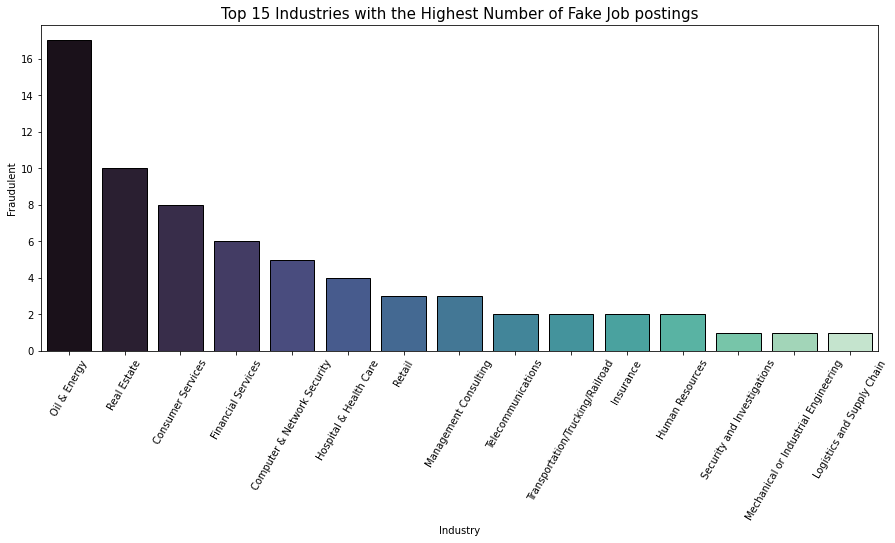

In [10]:
#Using seaborn to visualize the data
fig, ax= plt.subplots(figsize=(15,6))
sns.barplot(x='industry', y='fraudulent',data=highest_df.sort_values('fraudulent',
            ascending=False).head(15), palette='mako',edgecolor='black', ax=ax)
ax.tick_params(axis='x', labelrotation=60)
ax.set_title('Top 15 Industries with the Highest Number of Fake Job postings', fontsize=15);
plt.xlabel('Industry')
plt.ylabel('Fraudulent')